In [1]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

LOADING THE MNIST DATASET

In [2]:
dataset = torchvision.datasets.MNIST(
    root='./data', transform=torchvision.transforms.ToTensor(), download=True)

DEVICE CONFIG

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
input_size = 784 #28 * 28
hidden_size = 100
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [5]:
train_dataset = torchvision.datasets.MNIST(
    root='./data', train=True, transform=torchvision.transforms.ToTensor(), download=True)

In [6]:
test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, transform=torchvision.transforms.ToTensor(), download=True)

In [7]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)

In [8]:
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

In [9]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


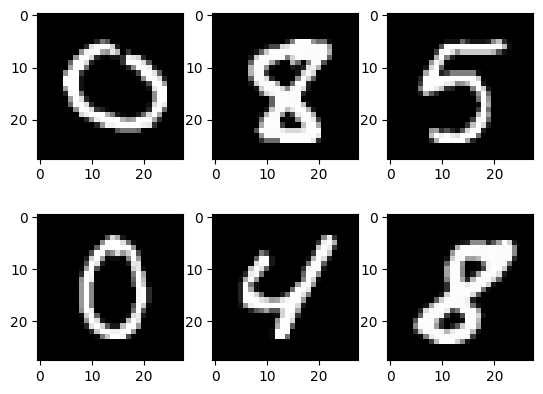

In [10]:
for i in range(6):
    plt.subplot(2,3, i + 1)
    plt.imshow(samples[i][0], cmap='gray')

plt.show()

In [11]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

#model
model = NeuralNet(input_size, hidden_size, num_classes)

#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

#training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        #forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        #backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch + 1} / {num_epochs}, step {i + 1} / {n_total_steps}, loss = {loss.item():.4f}')
        
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        #value, index
        _, pred = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (pred == labels).sum().item()
        
    acc = 100 * n_correct / n_samples
    print(f'accuracy = {acc}')

epoch 1 / 5, step 100 / 600, loss = 0.4896
epoch 1 / 5, step 200 / 600, loss = 0.5123
epoch 1 / 5, step 300 / 600, loss = 0.2610
epoch 1 / 5, step 400 / 600, loss = 0.1952
epoch 1 / 5, step 500 / 600, loss = 0.2079
epoch 1 / 5, step 600 / 600, loss = 0.3077
epoch 2 / 5, step 100 / 600, loss = 0.3569
epoch 2 / 5, step 200 / 600, loss = 0.1361
epoch 2 / 5, step 300 / 600, loss = 0.1731
epoch 2 / 5, step 400 / 600, loss = 0.1513
epoch 2 / 5, step 500 / 600, loss = 0.0970
epoch 2 / 5, step 600 / 600, loss = 0.1726
epoch 3 / 5, step 100 / 600, loss = 0.1987
epoch 3 / 5, step 200 / 600, loss = 0.1929
epoch 3 / 5, step 300 / 600, loss = 0.1334
epoch 3 / 5, step 400 / 600, loss = 0.1624
epoch 3 / 5, step 500 / 600, loss = 0.1738
epoch 3 / 5, step 600 / 600, loss = 0.2577
epoch 4 / 5, step 100 / 600, loss = 0.1313
epoch 4 / 5, step 200 / 600, loss = 0.0890
epoch 4 / 5, step 300 / 600, loss = 0.0875
epoch 4 / 5, step 400 / 600, loss = 0.1442
epoch 4 / 5, step 500 / 600, loss = 0.1812
epoch 4 / 5